In [4]:
import pandas as pd
import numpy as np
import gzip
import shutil
import time 
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

Make References and Folders 

In [ ]:
# Make Data Source folder
if not os.path.isdir('data_source'):
    os.system('mkdir data_source')
# Make folder containing reference genome
if not os.path.isdir('ref_genome'):
    os.system('mkdir ref_genome')
# make folder containing data for PCA/merging/zipping
if not os.path.isdir('data_sourcer'):
    os.system('mkdir data_sourcer')
# Copy reference genome to directory
os.system("cp -r " + dictionary['reference'] + "* ref_genome")

Convert FASTQ to BAM

In [23]:
# Fastq to BAM
!bwa mem ref_genome/Homo_sapiens_assembly38.fasta \
/datasets/dsc180a-wi20-public/Genome/fastq/testfile/SP1.fq | samtools sort -o SP1.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 250 sequences (7750 bp)...
[M::mem_process_seqs] Processed 250 reads in 0.242 CPU sec, 0.242 real sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa mem references/Homo_sapiens_assembly38.fasta /datasets/dsc180a-wi20-public/Genome/fastq/testfile/SP1.fq
[main] Real time: 6.670 sec; CPU: 5.690 sec


In [ ]:
# Convert reference to dictionary
!gatk CreateSequenceDictionary \
    -R references/Homo_sapiens_assembly38.fasta \
    -O references/Homo_sapiens_assembly38.dict

In [ ]:
# Get index of reference Index 
!samtools faidx references/Homo_sapiens_assembly38.fasta

In [ ]:
# Convert SAM to BAM
!gatk AddOrReplaceReadGroups \
-I SP1.bam \
-O align.bam \
-RGLB lib1 \
-RGPL pilot\
-RGPU SRR008003 \
-RGSM 20

BAM to VCF

In [ ]:
## BAM to VCF
#/datasets/dsc180a-wi20-public/Genome/resources/hg38
#!gatk --HaplotypeCaller bam vcf
!gatk HaplotypeCaller \
    -R references/Homo_sapiens_assembly38.fasta \
    -I align.bam \
    -O references/bam_vcf_converted.vcf

In [ ]:
## Load All 22 Chromosomes 
ch22=('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch21= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr21.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch20= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch19= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr19.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch18= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr18.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch17= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr17.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch16= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr16.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch15= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr15.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch14= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr14.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch13= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr13.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch12= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr12.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch11= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr11.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch10= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr10.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch9= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr9.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch8= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr8.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch7= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr7.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch6= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr6.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch5= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr5.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch4= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr4.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch3= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr3.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch2= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch1= ('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')

Filter VCF Filter using mag, geno, and mind

In [5]:
!plink2 --vcf $ch1 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch1
!plink2 --vcf $ch2 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch2
!plink2 --vcf $ch3 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch3
!plink2 --vcf $ch4 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch4
!plink2 --vcf $ch5 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch5
!plink2 --vcf $ch6 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch6
!plink2 --vcf $ch7 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch7
!plink2 --vcf $ch8 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch8
!plink2 --vcf $ch9 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch9
!plink2 --vcf $ch10 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch10
!plink2 --vcf $ch11 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch11
!plink2 --vcf $ch12 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch12
!plink2 --vcf $ch13 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch13
!plink2 --vcf $ch14 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch14
!plink2 --vcf $ch15 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch15
!plink2 --vcf $ch16 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch16
!plink2 --vcf $ch17 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch17
!plink2 --vcf $ch18 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch18
!plink2 --vcf $ch19 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch19
!plink2 --vcf $ch20 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch20
!plink2 --vcf $ch21 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch21
!plink2 --vcf $ch22 --make-bed --snps-only --maf 0.4 --geno 0.35 --mind 0.2 --recode vcf --out data_sourcer/cleaned_ch22


PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data_sourcer/cleaned_ch1.log.
Options in effect:
  --geno 0.35
  --maf 0.4
  --make-bed
  --mind 0.2
  --out data_sourcer/cleaned_ch1
  --recode vcf
  --snps-only
  --vcf /datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz

385382 MB RAM detected; reserving 192691 MB for main workspace.
--vcf: data_sourcer/cleaned_ch1-temporary.bed +
data_sourcer/cleaned_ch1-temporary.bim + data_sourcer/cleaned_ch1-temporary.fam
written.
5795045 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data_sourcer/cleaned_ch1.nosex .
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2548 founders and 0 nonfounders present.
Cal

Zip all Filtered VCF Files

In [6]:
!bgzip -c data_sourcer/cleaned_ch1.vcf > data_sourcer/cleaned_ch1.vcf.gz
!bgzip -c data_sourcer/cleaned_ch2.vcf > data_sourcer/cleaned_ch2.vcf.gz
!bgzip -c data_sourcer/cleaned_ch3.vcf > data_sourcer/cleaned_ch3.vcf.gz
!bgzip -c data_sourcer/cleaned_ch4.vcf > data_sourcer/cleaned_ch4.vcf.gz
!bgzip -c data_sourcer/cleaned_ch5.vcf > data_sourcer/cleaned_ch5.vcf.gz
!bgzip -c data_sourcer/cleaned_ch6.vcf > data_sourcer/cleaned_ch6.vcf.gz
!bgzip -c data_sourcer/cleaned_ch7.vcf > data_sourcer/cleaned_ch7.vcf.gz
!bgzip -c data_sourcer/cleaned_ch8.vcf > data_sourcer/cleaned_ch8.vcf.gz
!bgzip -c data_sourcer/cleaned_ch9.vcf > data_sourcer/cleaned_ch9.vcf.gz
!bgzip -c data_sourcer/cleaned_ch10.vcf > data_sourcer/cleaned_ch10.vcf.gz
!bgzip -c data_sourcer/cleaned_ch11.vcf > data_sourcer/cleaned_ch11.vcf.gz
!bgzip -c data_sourcer/cleaned_ch12.vcf > data_sourcer/cleaned_ch12.vcf.gz
!bgzip -c data_sourcer/cleaned_ch13.vcf > data_sourcer/cleaned_ch13.vcf.gz
!bgzip -c data_sourcer/cleaned_ch14.vcf > data_sourcer/cleaned_ch14.vcf.gz
!bgzip -c data_sourcer/cleaned_ch15.vcf > data_sourcer/cleaned_ch15.vcf.gz
!bgzip -c data_sourcer/cleaned_ch16.vcf > data_sourcer/cleaned_ch16.vcf.gz
!bgzip -c data_sourcer/cleaned_ch17.vcf > data_sourcer/cleaned_ch17.vcf.gz
!bgzip -c data_sourcer/cleaned_ch18.vcf > data_sourcer/cleaned_ch18.vcf.gz
!bgzip -c data_sourcer/cleaned_ch19.vcf > data_sourcer/cleaned_ch19.vcf.gz
!bgzip -c data_sourcer/cleaned_ch20.vcf > data_sourcer/cleaned_ch20.vcf.gz
!bgzip -c data_sourcer/cleaned_ch21.vcf > data_sourcer/cleaned_ch21.vcf.gz
!bgzip -c data_sourcer/cleaned_ch22.vcf > data_sourcer/cleaned_ch22.vcf.gz


Merge All VCF Files

In [9]:
!bcftools concat data_sourcer/cleaned_ch1.vcf.gz data_sourcer/cleaned_ch2.vcf.gz data_sourcer/cleaned_ch3.vcf.gz \
data_sourcer/cleaned_ch4.vcf.gz data_sourcer/cleaned_ch5.vcf.gz data_sourcer/cleaned_ch6.vcf.gz \
data_sourcer/cleaned_ch7.vcf.gz data_sourcer/cleaned_ch8.vcf.gz data_sourcer/cleaned_ch9.vcf.gz \
data_sourcer/cleaned_ch10.vcf.gz data_sourcer/cleaned_ch11.vcf.gz data_sourcer/cleaned_ch12.vcf.gz \
data_sourcer/cleaned_ch13.vcf.gz data_sourcer/cleaned_ch14.vcf.gz data_sourcer/cleaned_ch15.vcf.gz \
data_sourcer/cleaned_ch16.vcf.gz data_sourcer/cleaned_ch17.vcf.gz data_sourcer/cleaned_ch18.vcf.gz \
data_sourcer/cleaned_ch19.vcf.gz data_sourcer/cleaned_ch20.vcf.gz data_sourcer/cleaned_ch21.vcf.gz \
data_sourcer/cleaned_ch22.vcf.gz -o data_sourcer/merge_all_vcf.vcf

Checking the headers and starting positions of 22 files
Concatenating data_sourcer/cleaned_ch1.vcf.gz	2.443325 seconds
Concatenating data_sourcer/cleaned_ch2.vcf.gz	2.512762 seconds
Concatenating data_sourcer/cleaned_ch3.vcf.gz	3.023639 seconds
Concatenating data_sourcer/cleaned_ch4.vcf.gz	2.959083 seconds
Concatenating data_sourcer/cleaned_ch5.vcf.gz	2.160379 seconds
Concatenating data_sourcer/cleaned_ch6.vcf.gz	7.374585 seconds
Concatenating data_sourcer/cleaned_ch7.vcf.gz	1.725335 seconds
Concatenating data_sourcer/cleaned_ch8.vcf.gz	1.606488 seconds
Concatenating data_sourcer/cleaned_ch9.vcf.gz	1.199550 seconds
Concatenating data_sourcer/cleaned_ch10.vcf.gz	1.613455 seconds
Concatenating data_sourcer/cleaned_ch11.vcf.gz	1.705405 seconds
Concatenating data_sourcer/cleaned_ch12.vcf.gz	1.542754 seconds
Concatenating data_sourcer/cleaned_ch13.vcf.gz	1.310112 seconds
Concatenating data_sourcer/cleaned_ch14.vcf.gz	5.025921 seconds
Concatenating data_sourcer/cleaned_ch15.vcf.gz	1.232168 s

Run PCA on Merged VCF's

In [3]:
%time !plink2 --vcf data_sourcer/merge_all_vcf.vcf --pca 2 

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --pca 2
  --vcf data_sourcer/merge_all_vcf.vcf

385382 MB RAM detected; reserving 192691 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
985727 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using up to 79 threads (change this with --threads).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
985727 variants and 2548 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation c

In [5]:
eigenval = pd.read_csv('plink.eigenval', header= None)
eigenval

,0
0,285.893
1,127.299


,Sample name,pop,x,y
0,HG00096,HG00096,-0.009929,0.025543
1,HG00097,HG00097,-0.009578,0.026795
2,HG00099,HG00099,-0.010054,0.026783
3,HG00100,HG00100,-0.009781,0.026462
4,HG00101,HG00101,-0.008940,0.026261
5,HG00102,HG00102,-0.010608,0.025904
6,HG00103,HG00103,-0.010783,0.025968
7,HG00104,HG00104,-0.010197,0.027008
8,HG00105,HG00105,-0.009767,0.026830
9,HG00106,HG00106,-0.010769,0.027150


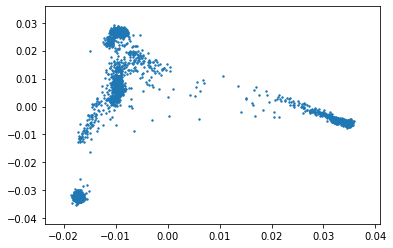

In [5]:
eigenval = pd.read_csv('plink.eigenval', header= None)

eigenvec = pd.read_csv('plink.eigenvec', delimiter=' ',header=None, names= ['Sample name','pop','x','y'])
pca = plt.scatter(eigenvec['x'], eigenvec['y'],s=2)
plt.savefig('pca.png')

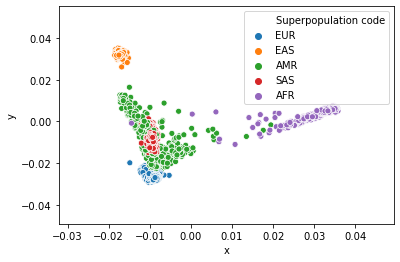

In [6]:
codes= pd.read_csv('igsr_samples.tsv',sep='\t')[['Sample name', 'Sex', 'Superpopulation code']]
eigen_pop= eigenvec.join(codes.set_index('Sample name'), on= 'Sample name')
plotting = sns.scatterplot(x=eigen_pop.x, y= -1 * eigen_pop.y, hue=eigen_pop['Superpopulation code'])
plotting.figure.savefig("pca_all22.png")

Merging 3 Chromosomes

In [5]:
# Merge 3 VCFS
!bcftools concat data_source/cleaned_ch20.vcf.gz \
data_source/cleaned_ch21.vcf.gz data_source/cleaned_ch22.vcf.gz -o data_source/merged_vcf.vcf

Checking the headers and starting positions of 3 files
[E::hts_open_format] Failed to open file "data_source/cleaned_ch20.vcf.gz" : No such file or directory
Failed to open: data_source/cleaned_ch20.vcf.gz


In [15]:
# Run PCA of merged 
%time !plink2 --vcf data_source/merged_vcf.vcf --pca 2 

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --pca 2
  --vcf data_source/merged_vcf.vcf

257652 MB RAM detected; reserving 128826 MB for main workspace.
Error: Failed to open data_source/merged_vcf.vcf.
CPU times: user 10.5 ms, sys: 86.3 ms, total: 96.8 ms
Wall time: 1.2 s


In [6]:
eigenval = pd.read_csv('plink.eigenval', header= None)
eigenval

,0
0,291.197
1,123.383


In [12]:
eigenvec = pd.read_csv('plink.eigenvec', delimiter=' ',header=None, names= ['pop_code','b','x','y'])

In [13]:
def plotting(eigenval, eigenvec, population_tsv):
        val = pd.read_csv(eigenval, header= None)
        vec = pd.read_csv(eigenvec, delimiter=' ',header=None, names= ['Sample name','pop','x','y'])
        codes= pd.read_csv(population_tsv,sep='\t')[['Sample name', 'Sex', 'Superpopulation code']]
        eigen_pop= vec.join(codes.set_index('Sample name'), on= 'Sample name')
        plotting = sns.scatterplot(x=eigen_pop.x, y= eigen_pop.y, hue=eigen_pop['Superpopulation code'])
        plotting.figure.savefig("pca_all22.png")


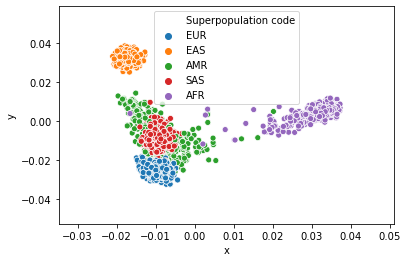

In [16]:
# Plot PCA
plotting('plink.eigenval','plink.eigenvec','igsr_samples.tsv')